In [75]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [76]:
d0=pd.read_csv('./mnist_train.csv');
print(d0.head(5));

   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]


In [77]:
l=d0["label"];
d=d0.drop("label",axis=1);
print(d.shape)
print(l.shape)

(60000, 784)
(60000,)


In [78]:
labels=l.head(15000);
data=d.head(15000);
print("The shape of the sample data and labels are ", data.shape,labels.shape);

The shape of the sample data and labels are  (15000, 784) (15000,)


In [79]:
std_data = StandardScaler().fit_transform(data);
print(std_data.shape);

(15000, 784)


In [80]:
data_1000=std_data[0:10000,:];
labels_1000=labels[0:10000];
print(labels_1000.shape)

(10000,)


In [81]:
from sklearn.manifold import TSNE
model=TSNE(n_components=2,random_state=0)
tsne_data=model.fit_transform(data_1000);
print(tsne_data.shape)

/Users/manoj/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/manoj/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(10000, 2)


In [82]:
tsne_data=np.vstack((tsne_data.T, labels_1000)).T
print(tsne_data.shape)


(10000, 3)


/Users/manoj/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


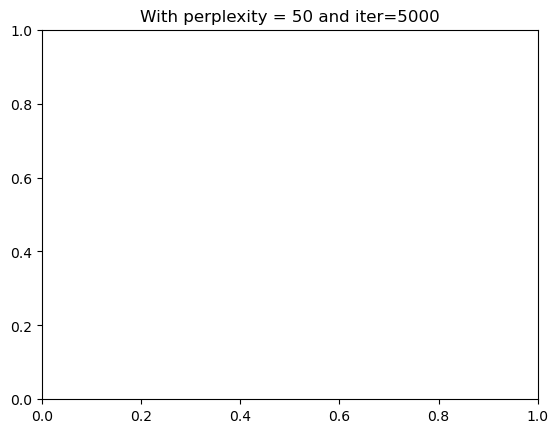

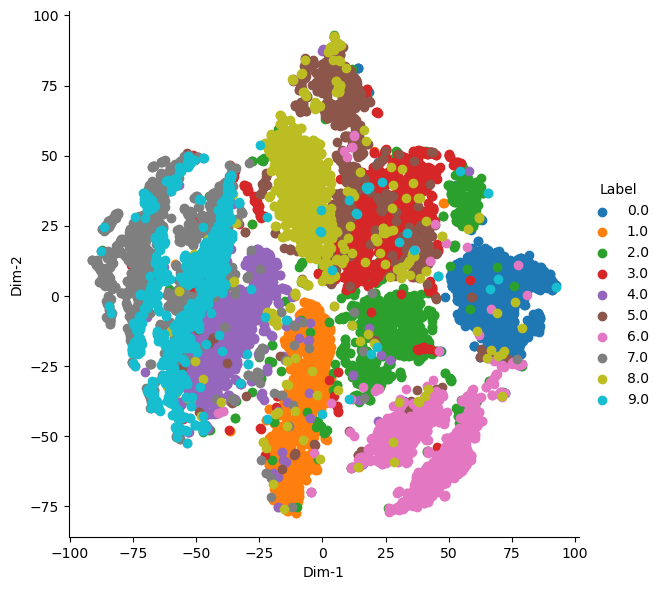

In [83]:
tsne_df=pd.DataFrame(data=tsne_data,columns=("Dim-1","Dim-2","Label"));
import seaborn as sn;
sn.FacetGrid(tsne_df,hue="Label", size=6).map(plt.scatter,"Dim-1","Dim-2").add_legend();
plt.show()

In [84]:
## With Perplexity 50 and default iter=1000
model=TSNE(n_components=2,random_state=0, perplexity=50)
tsne_data=model.fit_transform(data_1000);

/Users/manoj/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/manoj/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [85]:
tsne_data=np.vstack((tsne_data.T, labels_1000)).T
print(tsne_data.shape)

(10000, 3)


/Users/manoj/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


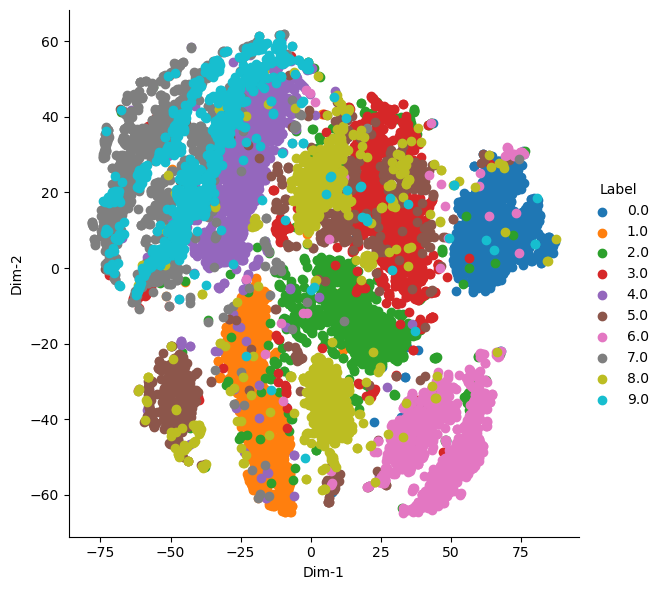

Text(0.5, 1.0, 'With perplexity = 50')

In [86]:
tsne_df=pd.DataFrame(data=tsne_data,columns=("Dim-1","Dim-2","Label"));
sn.FacetGrid(tsne_df,hue="Label", size=6).map(plt.scatter,"Dim-1","Dim-2").add_legend();
plt.show()
plt.title("With perplexity = 50")

In [87]:
### With Perplexity 50 and  iter=5000
model=TSNE(n_components=2,random_state=0, perplexity=50, n_iter=5000)
tsne_data=model.fit_transform(data_1000);

/Users/manoj/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/manoj/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [88]:
tsne_data=np.vstack((tsne_data.T, labels_1000)).T
print(tsne_data.shape)

(10000, 3)


/Users/manoj/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


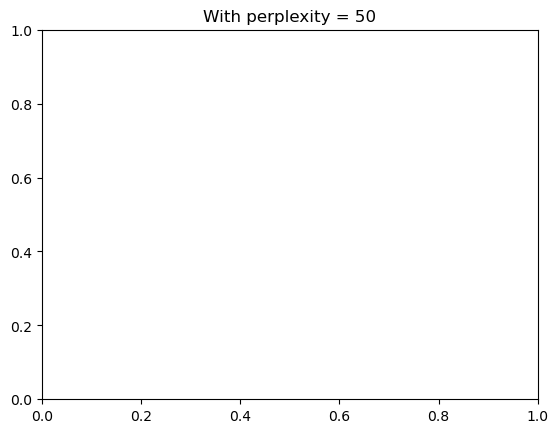

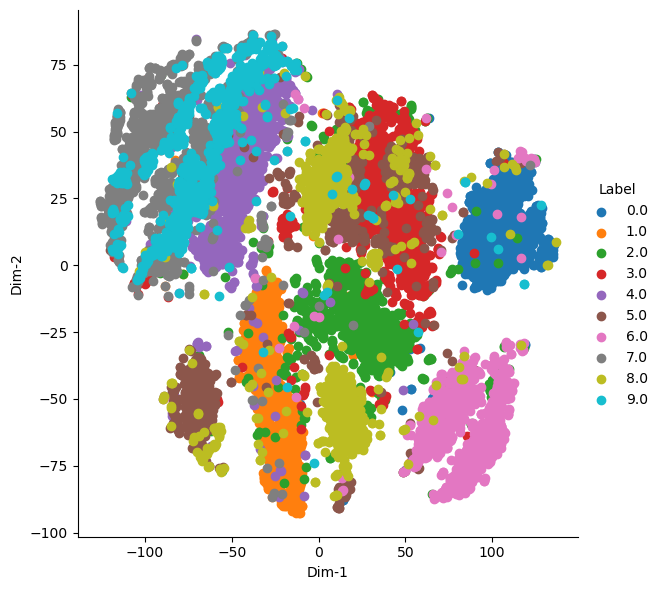

Text(0.5, 1.0, 'With perplexity = 50 and iter=5000')

In [89]:
tsne_df=pd.DataFrame(data=tsne_data,columns=("Dim-1","Dim-2","Label"));
sn.FacetGrid(tsne_df,hue="Label", size=6).map(plt.scatter,"Dim-1","Dim-2").add_legend();
plt.show()
plt.title("With perplexity = 50 and iter=5000")